# UMAPs Neurips samples, NK cells

EG48 and EG49 are AML cases, 35% and 24% of bone marrow cells are blasts, respectively. 

In this notebook samples are merged together, after which NK cell cluster is defined and NK cells are selected for further analysis. All UMAPs are generated based on latent space coordinates. 

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



In [127]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG48_norm.h5ad')

In [128]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG49_norm.h5ad')

In [129]:
adata

AnnData object with n_obs × n_vars = 1734 × 13679
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [130]:
adata1

AnnData object with n_obs × n_vars = 2111 × 14711
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [131]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata, use_rep="X_totalVI")    

sc.tl.umap(adata)


In [132]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata1, use_rep="X_totalVI")    

sc.tl.umap(adata1)

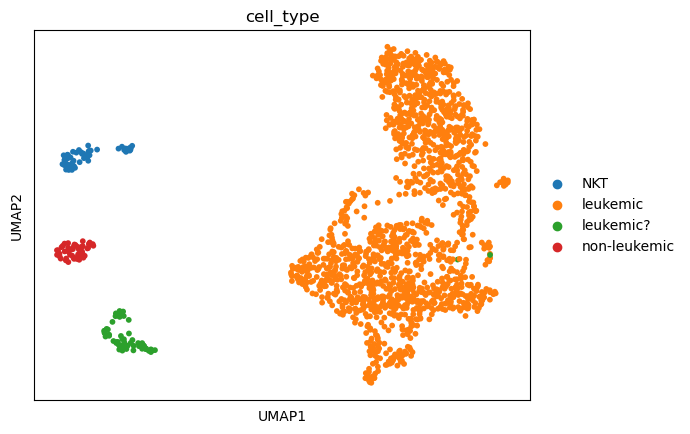

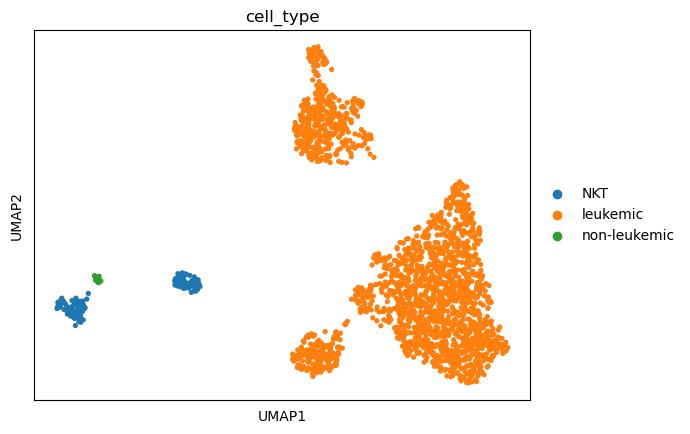

In [133]:
#latent space

sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')
sc.pl.umap(adata1, color = ['cell_type'], color_map = 'viridis')

In [134]:
adata_merged = adata.concatenate(adata1, index_unique=None)

In [135]:
adata_merged.obs['cell_type']

AAACCTGAGCGATGAC-1-105    leukemic
AAACCTGCAGACACTT-1-105    leukemic
AAACCTGGTCCATCCT-1-105    leukemic
AAACCTGTCCGGGTGT-1-105    leukemic
AAACGGGAGTGTACGG-1-105    leukemic
                            ...   
TTTGGTTTCGGCTTGG-1-116    leukemic
TTTGGTTTCTATCGCC-1-116    leukemic
TTTGTCAAGAAGAAGC-1-116    leukemic
TTTGTCACAGTTAACC-1-116    leukemic
TTTGTCATCCAGAGGA-1-116    leukemic
Name: cell_type, Length: 3845, dtype: object

In [136]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [137]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [138]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [139]:
adata_merged

AnnData object with n_obs × n_vars = 3845 × 13376
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_express

In [140]:
#save the file!

adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/AML_norm.h5ad')

In [141]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

In [142]:
adata_merged.X

<3845x13376 sparse matrix of type '<class 'numpy.float32'>'
	with 9627706 stored elements in Compressed Sparse Row format>

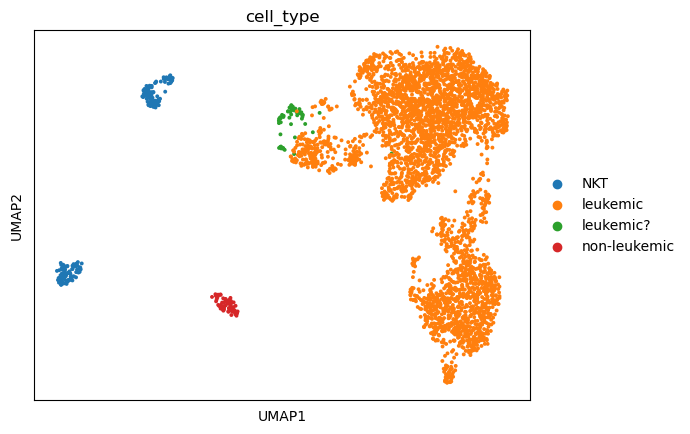

In [143]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

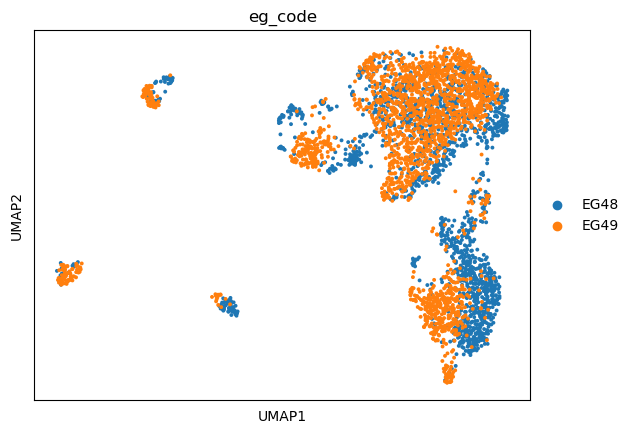

In [144]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [145]:
eg48 = adata_merged[adata_merged.obs['eg_code'] == "EG48"]

eg48.shape

(1734, 13376)

In [146]:
eg49 = adata_merged[adata_merged.obs['eg_code'] == "EG49"]

eg49.shape

(2111, 13376)

In [147]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [148]:
sc.tl.leiden(adata_merged, resolution = 1, key_added = "leiden_1")

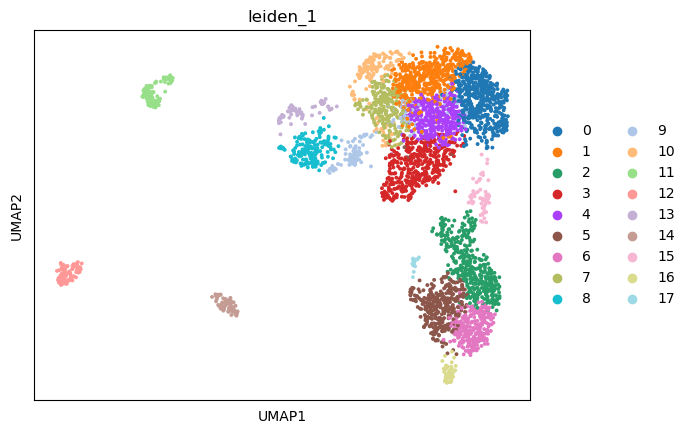

In [149]:
sc.pl.umap(adata_merged, color=['leiden_1'], ncols =3)

In [150]:
#Markers received from HRUH, KLRC1 = NKG2A

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["NKG2A","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [151]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers.append(x)
        



FGFBP2
FCGR3A
S1PR5
KLRD1
GNLY
GZMB
CX3CR1
GPR56
PRF1
KLRB1
SPON2
NKG7
TTC38
FCRL6
LILRB1
PLAC8
MBP


In [152]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers2.append(x)




NCAM1
GZMA
KLRB1
GZMH
B2M
HLA-DRA
OAS3
MX1
IRF7
MX2
IRF9
OAS1
OAS2
EIF2AK2
TNFRSF18
TNFRSF4
CRTAM
ENTPD1
HAVCR2
TIGIT
TNFSF10
BCL2L11
CCL3
CCL4
TNF
IFNG
CD69


In [153]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['FGFBP2',
 'FCGR3A',
 'S1PR5',
 'KLRD1',
 'GNLY',
 'GZMB',
 'CX3CR1',
 'GPR56',
 'PRF1',
 'KLRB1',
 'SPON2',
 'NKG7',
 'TTC38',
 'FCRL6',
 'LILRB1',
 'PLAC8',
 'MBP',
 'NCAM1',
 'GZMA',
 'KLRB1',
 'GZMH',
 'B2M',
 'HLA-DRA',
 'OAS3',
 'MX1',
 'IRF7',
 'MX2',
 'IRF9',
 'OAS1',
 'OAS2',
 'EIF2AK2',
 'TNFRSF18',
 'TNFRSF4',
 'CRTAM',
 'ENTPD1',
 'HAVCR2',
 'TIGIT',
 'TNFSF10',
 'BCL2L11',
 'CCL3',
 'CCL4',
 'TNF',
 'IFNG',
 'CD69']

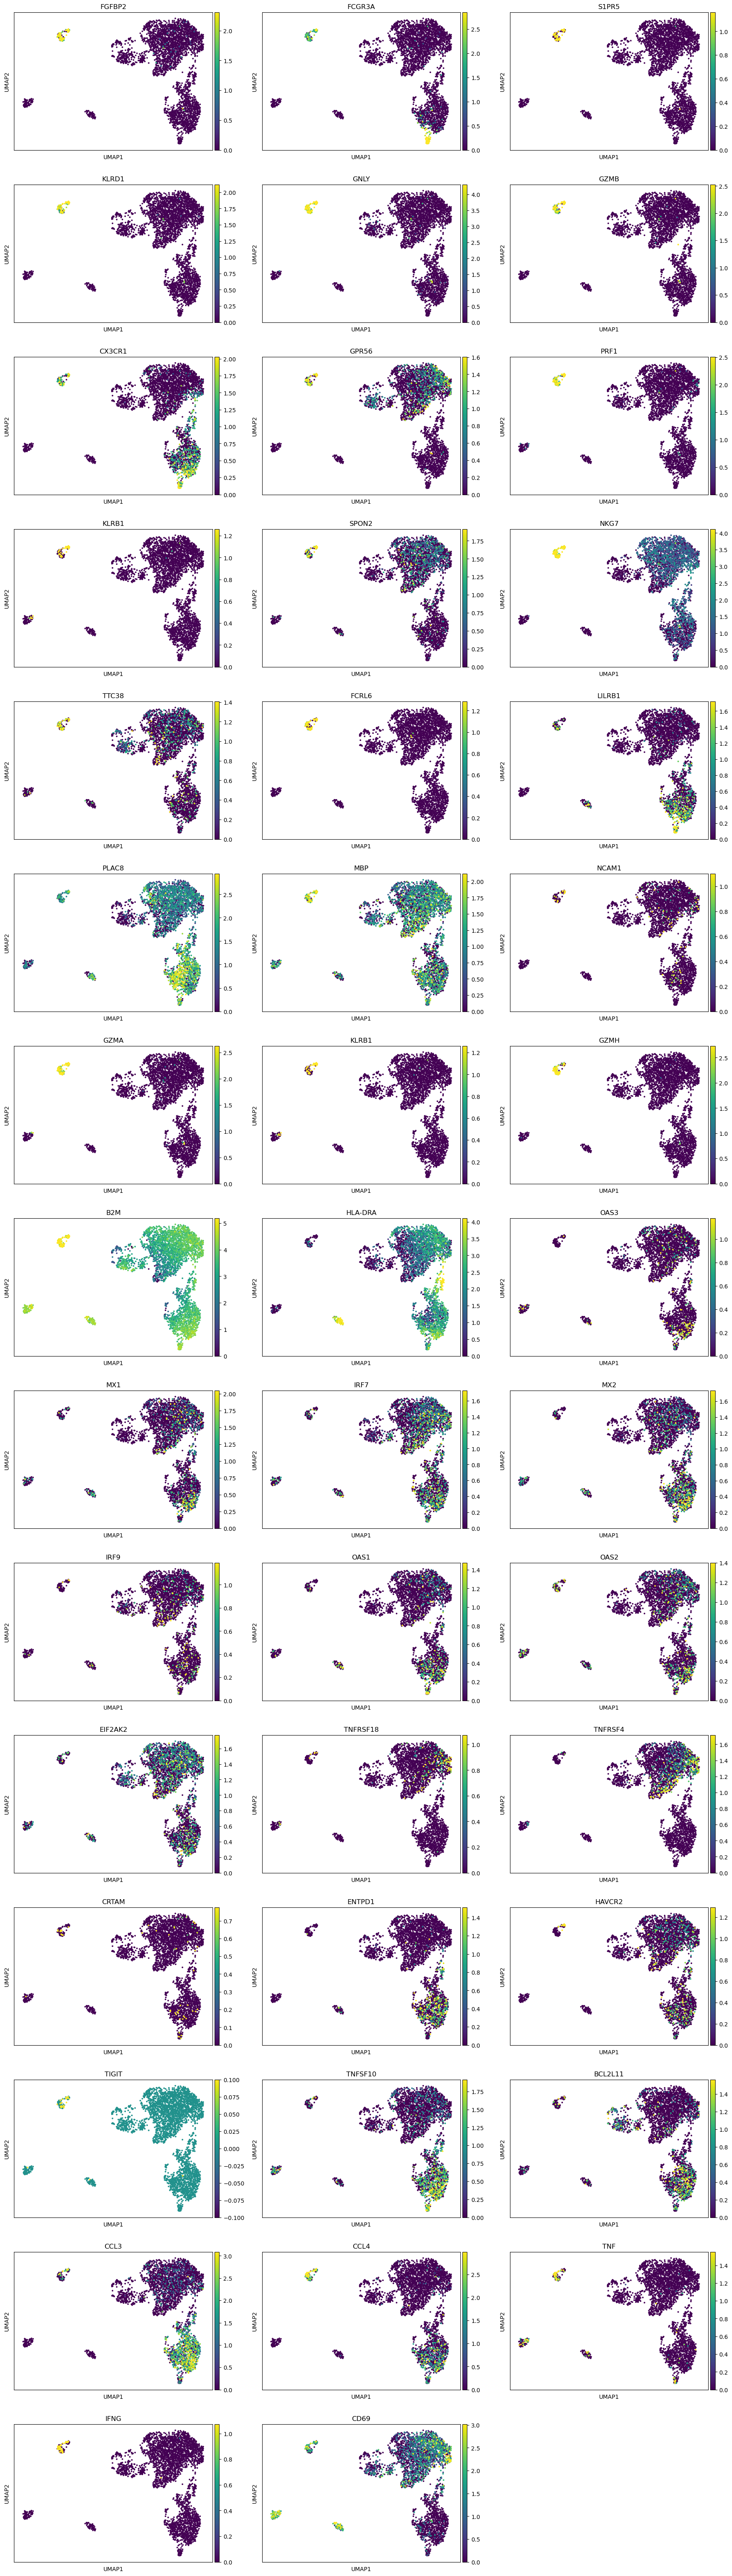

In [154]:
sc.pl.umap(adata_merged, color=nk_markers, ncols =3, vmax="p99")

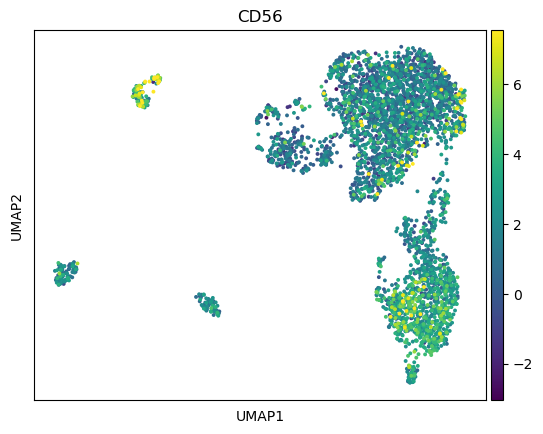

In [155]:
nk_prot = ['CD56']

sc.pl.umap(adata_merged, color=nk_prot, ncols =3, vmax="p99")

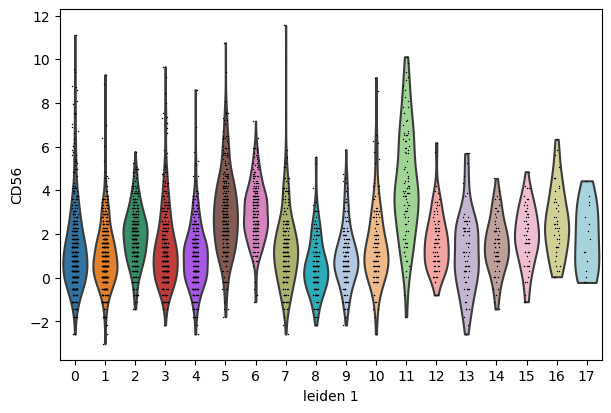

In [156]:
sc.pl.violin(adata_merged, ['CD56'], groupby='leiden_1')

- Based on protein + RNA marker expression cluster 11 can be identified as NK cells. 


In [157]:
adata_merged

AnnData object with n_obs × n_vars = 3845 × 13376
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'neighbors', 'umap', 'cell_type_colors', 'eg_code_colors', 

In [158]:
#selecting NK cell cluster
adata_nk = adata_merged[adata_merged.obs['leiden_1'] == "4"]

In [159]:
adata_nk

View of AnnData object with n_obs × n_vars = 347 × 13376
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'neighbors', 'umap', 'cell_type_colors', 'eg_code_co

In [160]:
#calculating neigbors for object containing only NK cells, based on latent space

sc.pp.neighbors(adata_nk, use_rep="X_totalVI")

sc.tl.umap(adata_nk)

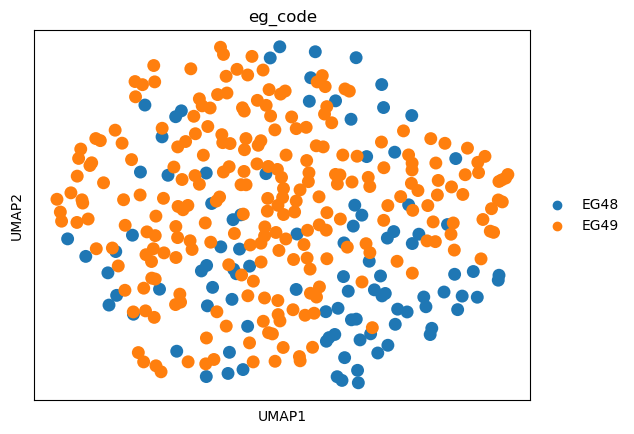

In [161]:
sc.pl.umap(adata_nk, color = ["eg_code"])

In [162]:
#Calculating leidens for latent object
sc.tl.leiden(adata_nk, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata_nk, resolution = 0.7, key_added = "leiden_0.7")
sc.tl.leiden(adata_nk, resolution = 0.8, key_added = "leiden_0.8")


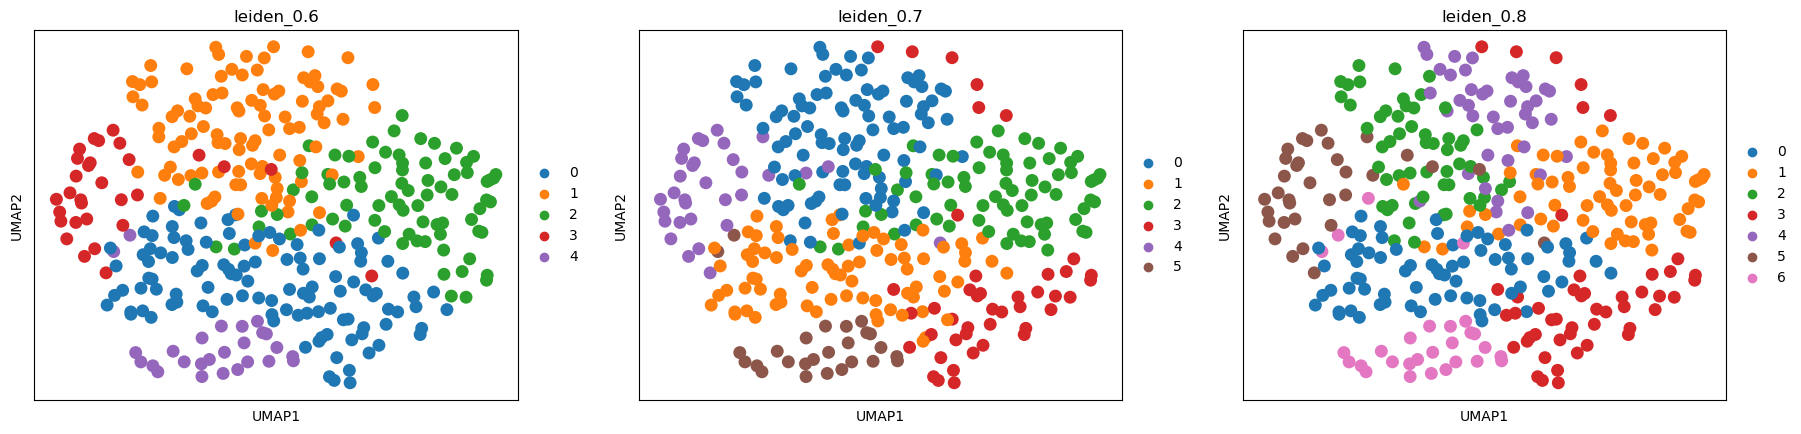

In [163]:
sc.pl.umap(adata_nk, color=['leiden_0.6', 'leiden_0.7', 'leiden_0.8'], ncols =3)

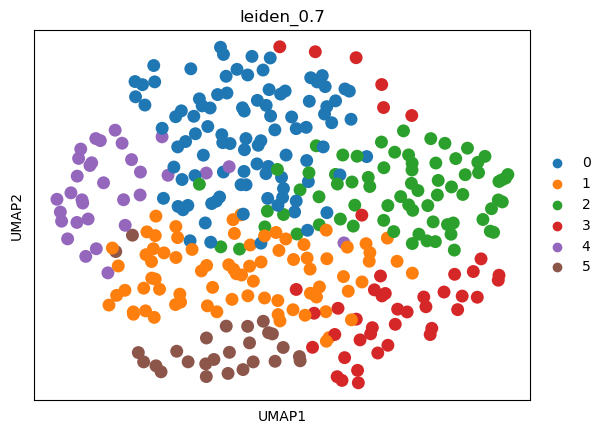

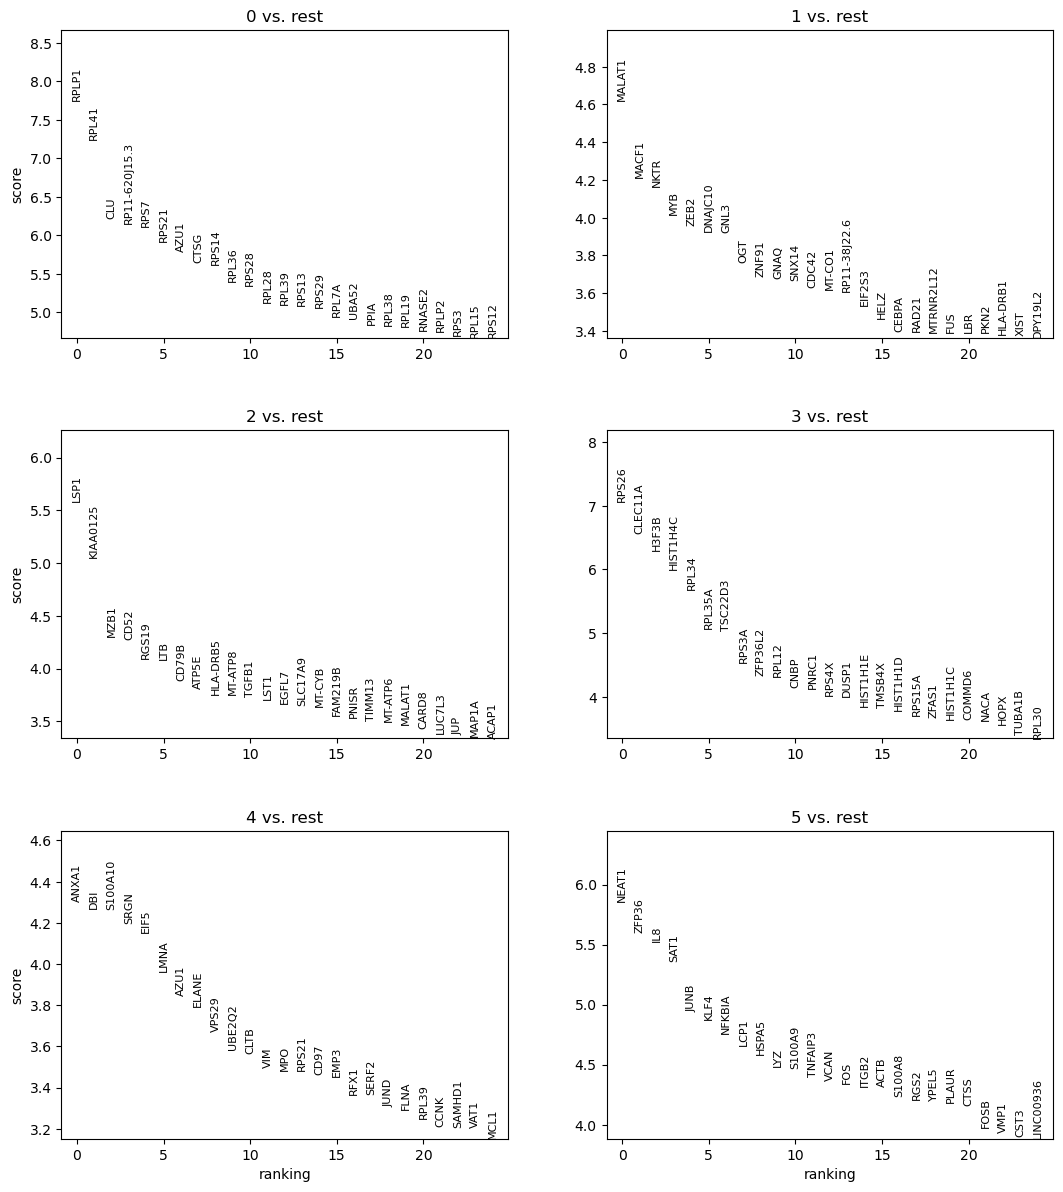

In [164]:
sc.pl.umap(adata_nk, color=['leiden_0.7'], ncols =3)

sc.tl.rank_genes_groups(adata_nk, 'leiden_0.7', method='wilcoxon')
sc.pl.rank_genes_groups(adata_nk, n_genes=25, sharey=False, ncols=2)

- Here cluster 3 probably contains cells mostly from EG48 sample.

In [165]:
#Removing mitochondrial and ribosomal genes

#genes to be removed
mito_genes = adata_nk.var_names.str.startswith('MT-')
ribo_genes = adata_nk.var_names.str.startswith('RPL')
ribo_genes1 = adata_nk.var_names.str.startswith('RPS')

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, ribo_genes1)

#other genes kept
keep = np.invert(remove)

adata_nk = adata_nk[:,keep]

#print(adata_gex.n_obs, adata_gex.n_vars)

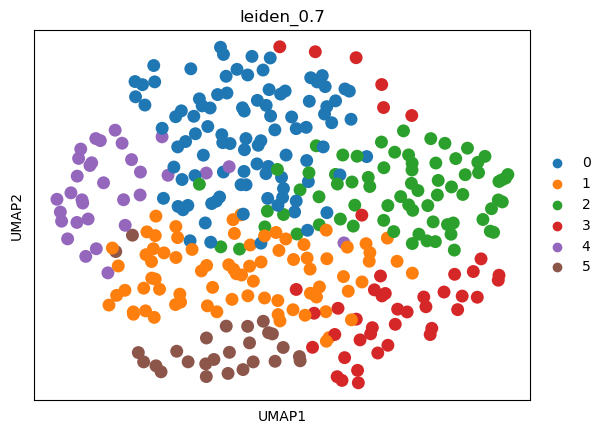

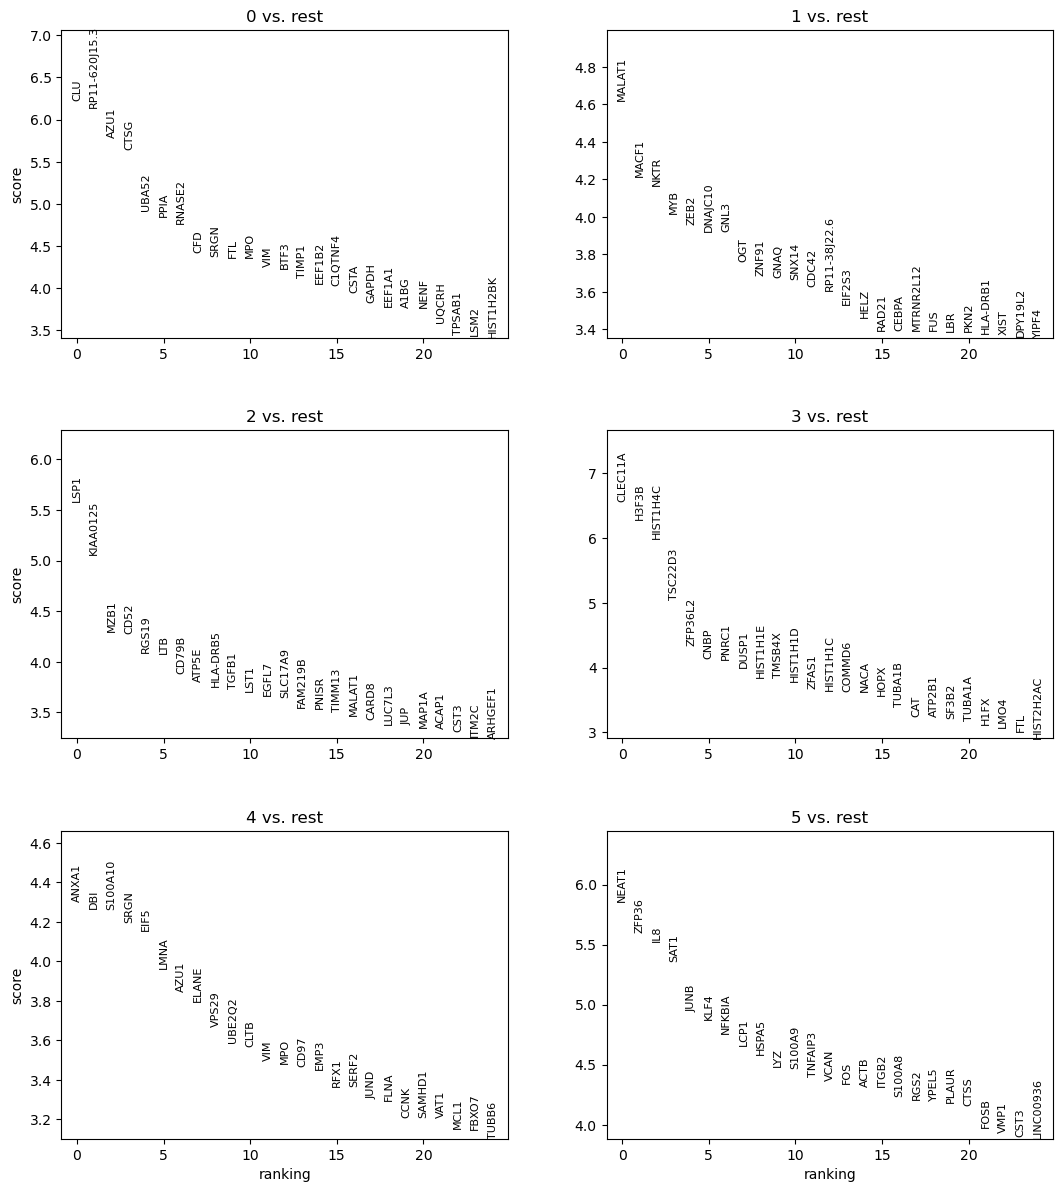

In [182]:
sc.pl.umap(adata_nk, color=['leiden_0.7'], ncols =3)

sc.tl.rank_genes_groups(adata_nk, 'leiden_0.7', method='wilcoxon')
sc.pl.rank_genes_groups(adata_nk, n_genes=25, sharey=False, ncols=2)

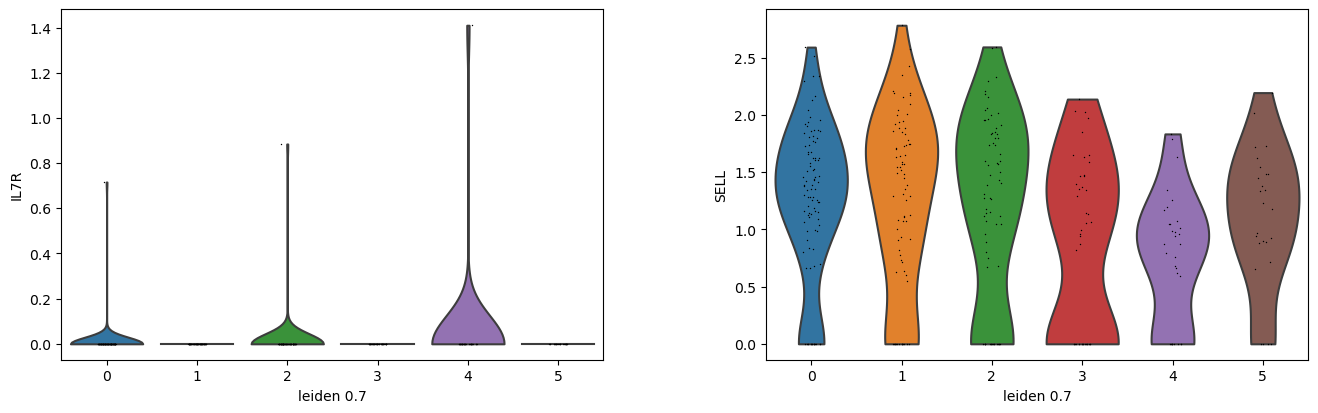

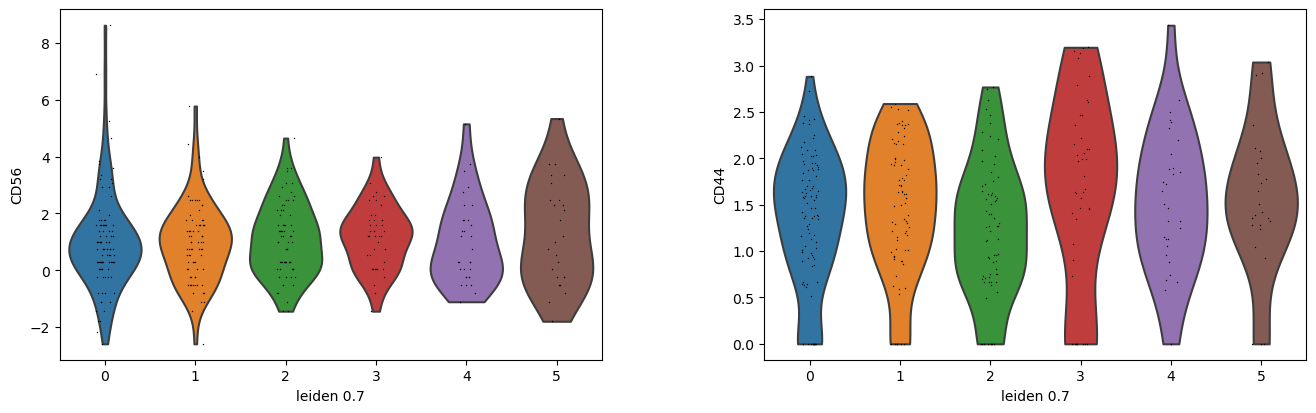

In [183]:
#CD56bright markers

sc.pl.violin(adata_nk, ['IL7R', 'SELL'], groupby='leiden_0.7')

sc.pl.violin(adata_nk, ['CD56', 'CD44'], groupby='leiden_0.7')

RNA markers


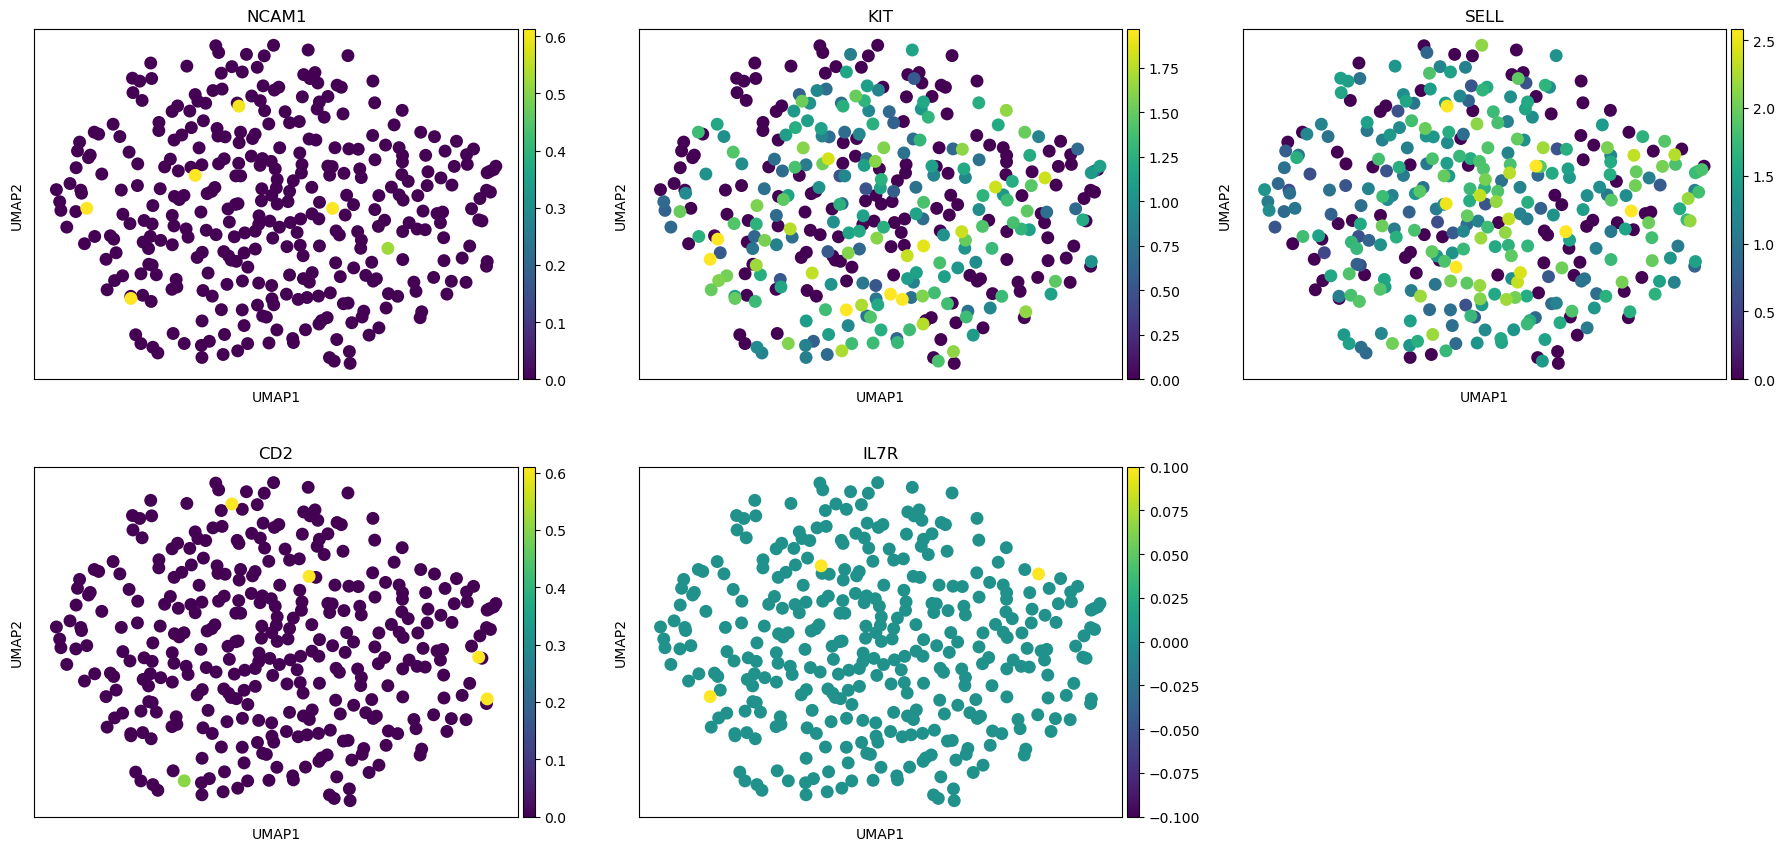

Protein markers


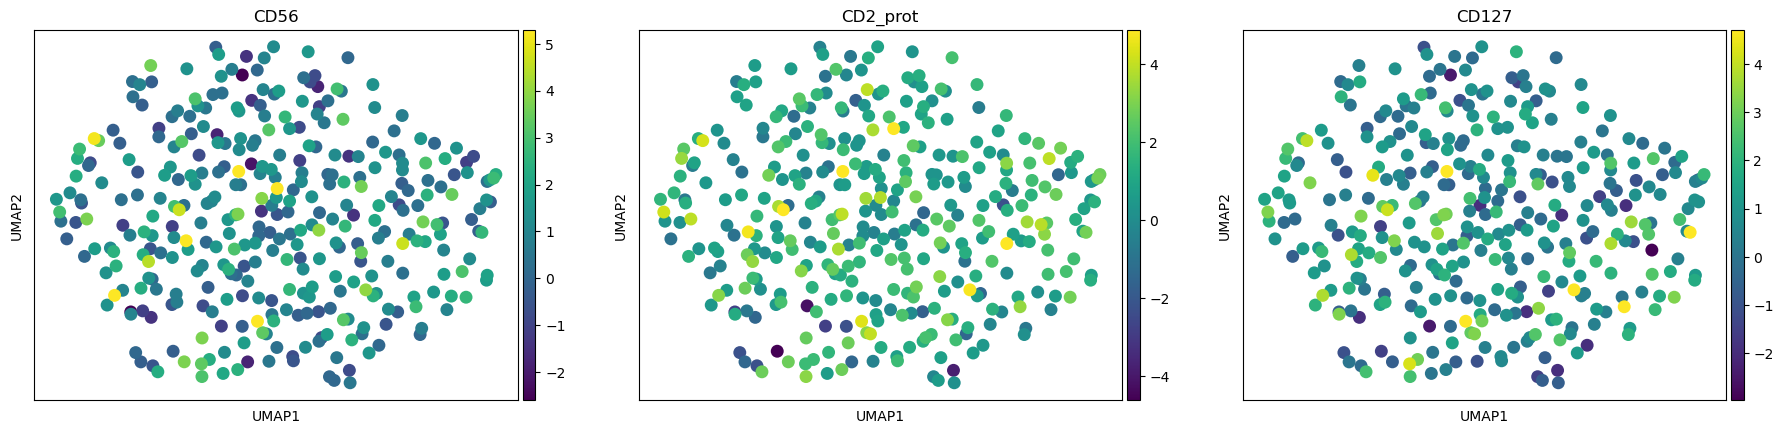

In [173]:
#CD56bright NK cells
#SELL = CD62L, NCAM1 = CD56, IL7R = CD127

cd56bright_mels = ['NCAM1', 'KIT', 'SELL', 'CD2', 'IL7R'] #KLRC1 not found
cd56bright_mels_prot= ['CD56', "CD2_prot", 'CD127'] #CD62L not measured

print("RNA markers")
sc.pl.umap(adata_nk, color=cd56bright_mels, ncols = 3, vmax="p99")

print("Protein markers")

sc.pl.umap(adata_nk, color=cd56bright_mels_prot, ncols = 3, vmax="p99")

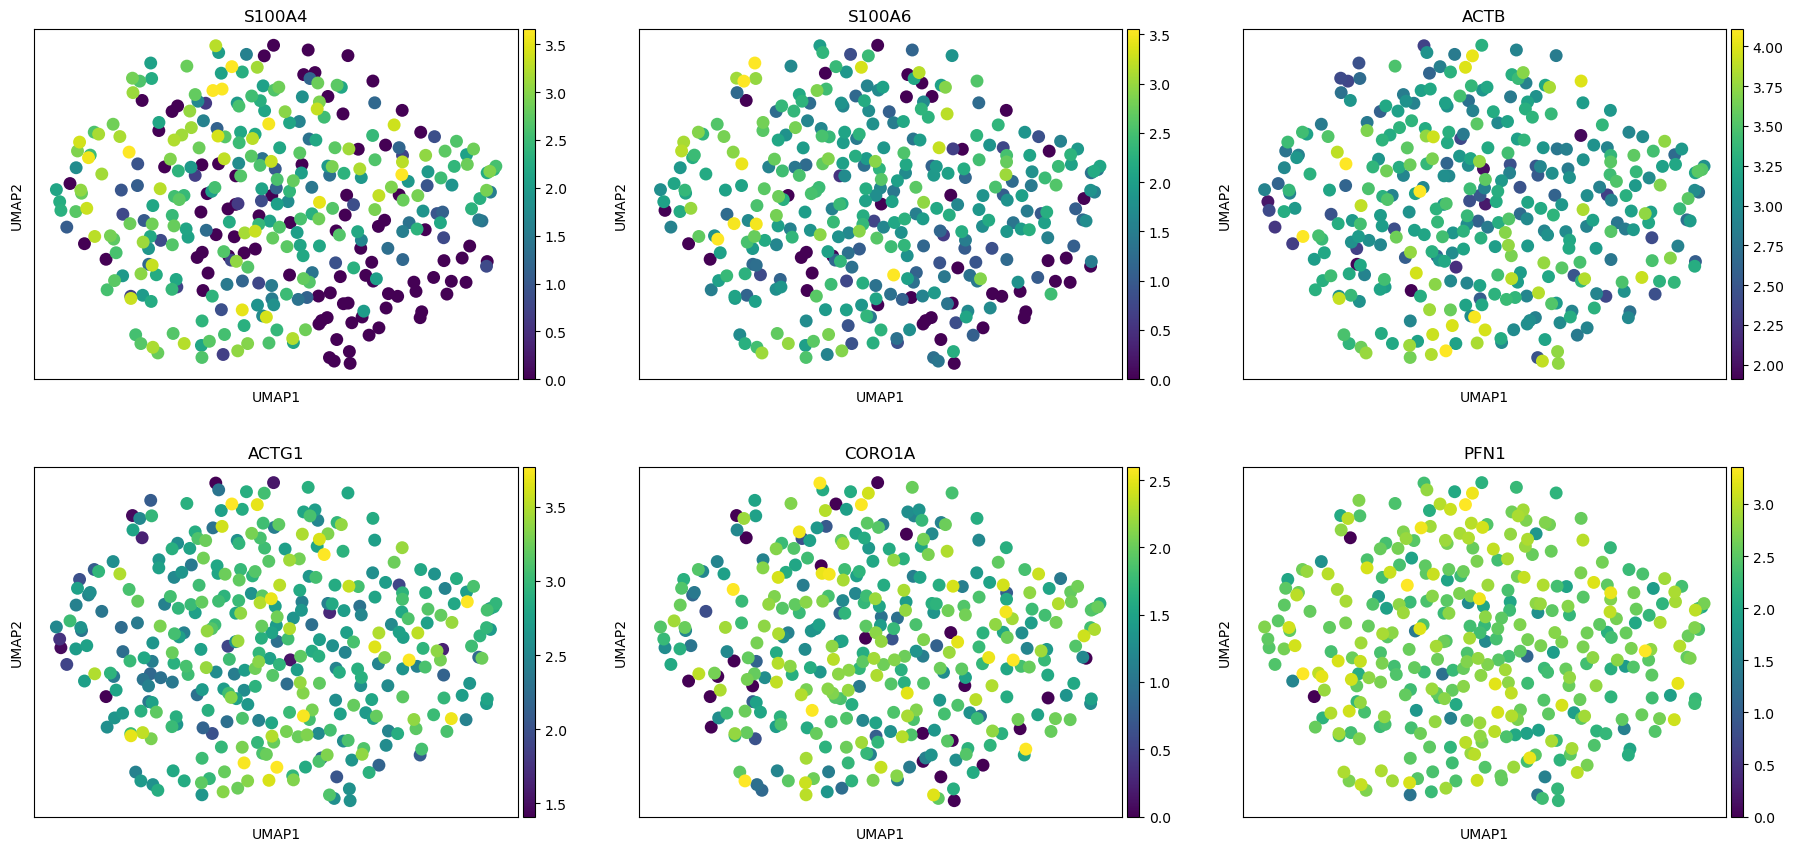

In [176]:
#Mature NK cells

cd56dim_1_high= ['S100A4', 'S100A6', 'ACTB', 'ACTG1', 'CORO1A', 'PFN1']
# cd56dim_1_low = ['GZMK'] not measured

sc.pl.umap(adata_nk, color=cd56dim_1_high, ncols = 3, vmax="p99")
#sc.pl.umap(adata_nk, color=cd56dim_1_low, ncols = 3, vmax="p99")



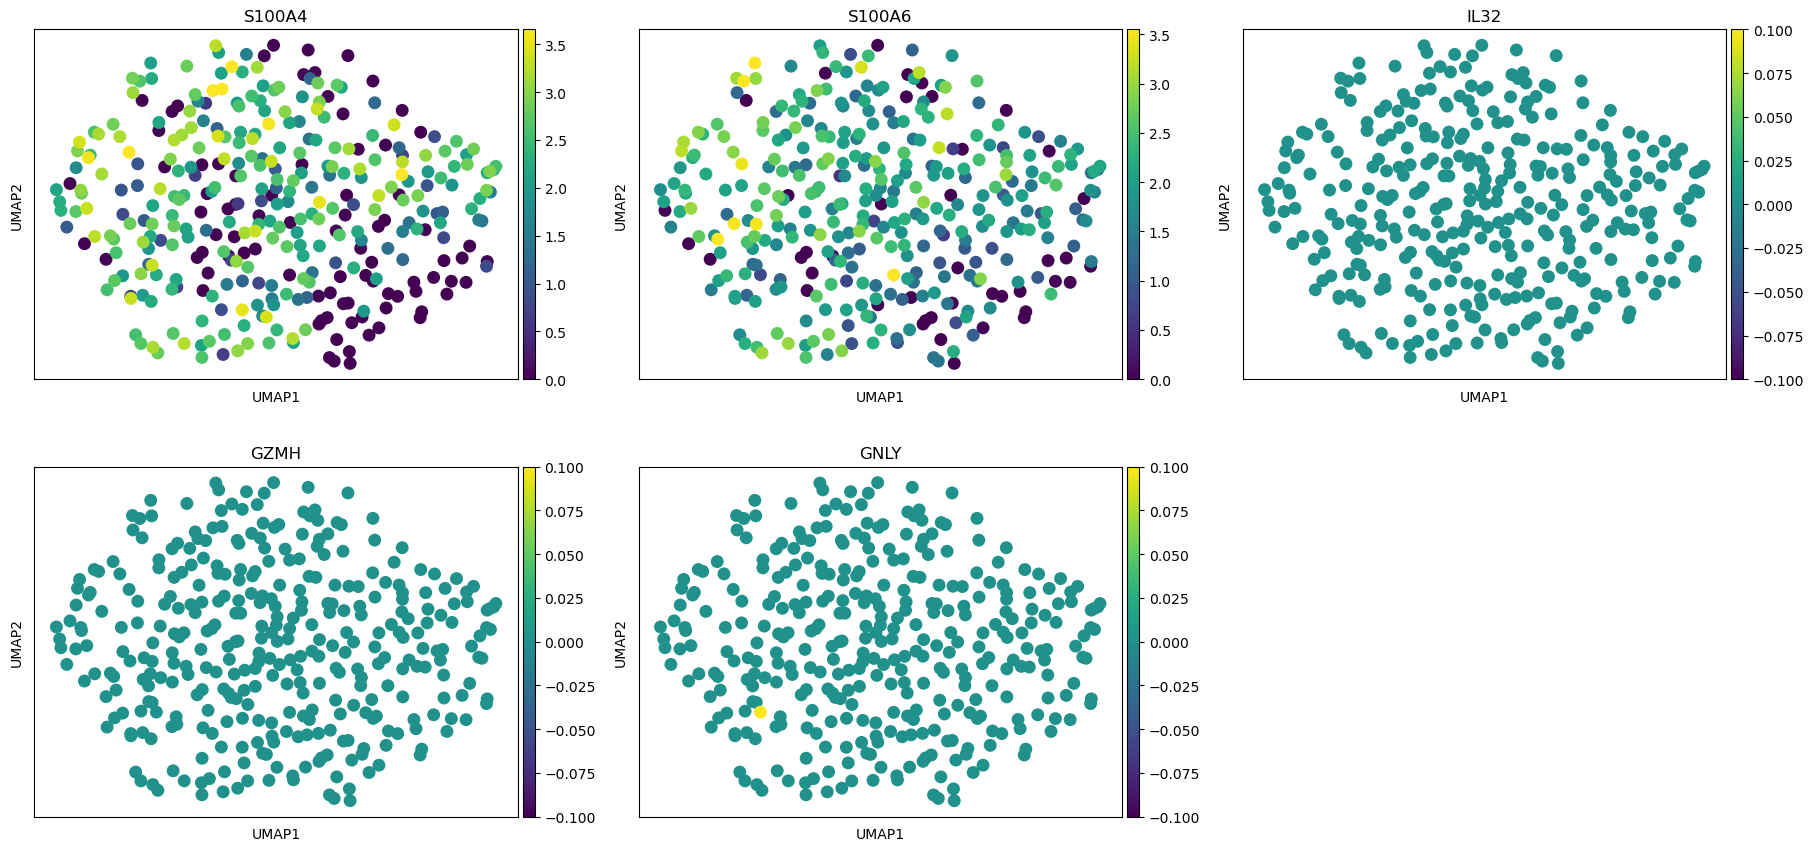

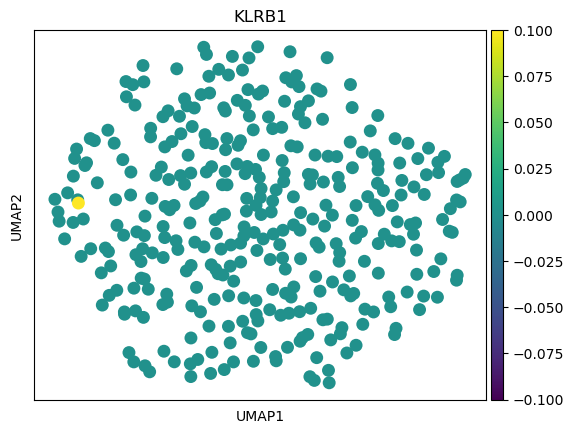

In [179]:
#proliferating NK

prolif_high = ['S100A4', 'S100A6', 'IL32', 'GZMH', 'GNLY'] #KLRC2 not found
prolif_low = ['KLRB1'] #KLRC1 not found

sc.pl.umap(adata_nk, color=prolif_high, ncols = 3, vmax="p99")
sc.pl.umap(adata_nk, color=prolif_low, ncols = 3, vmax="p99")

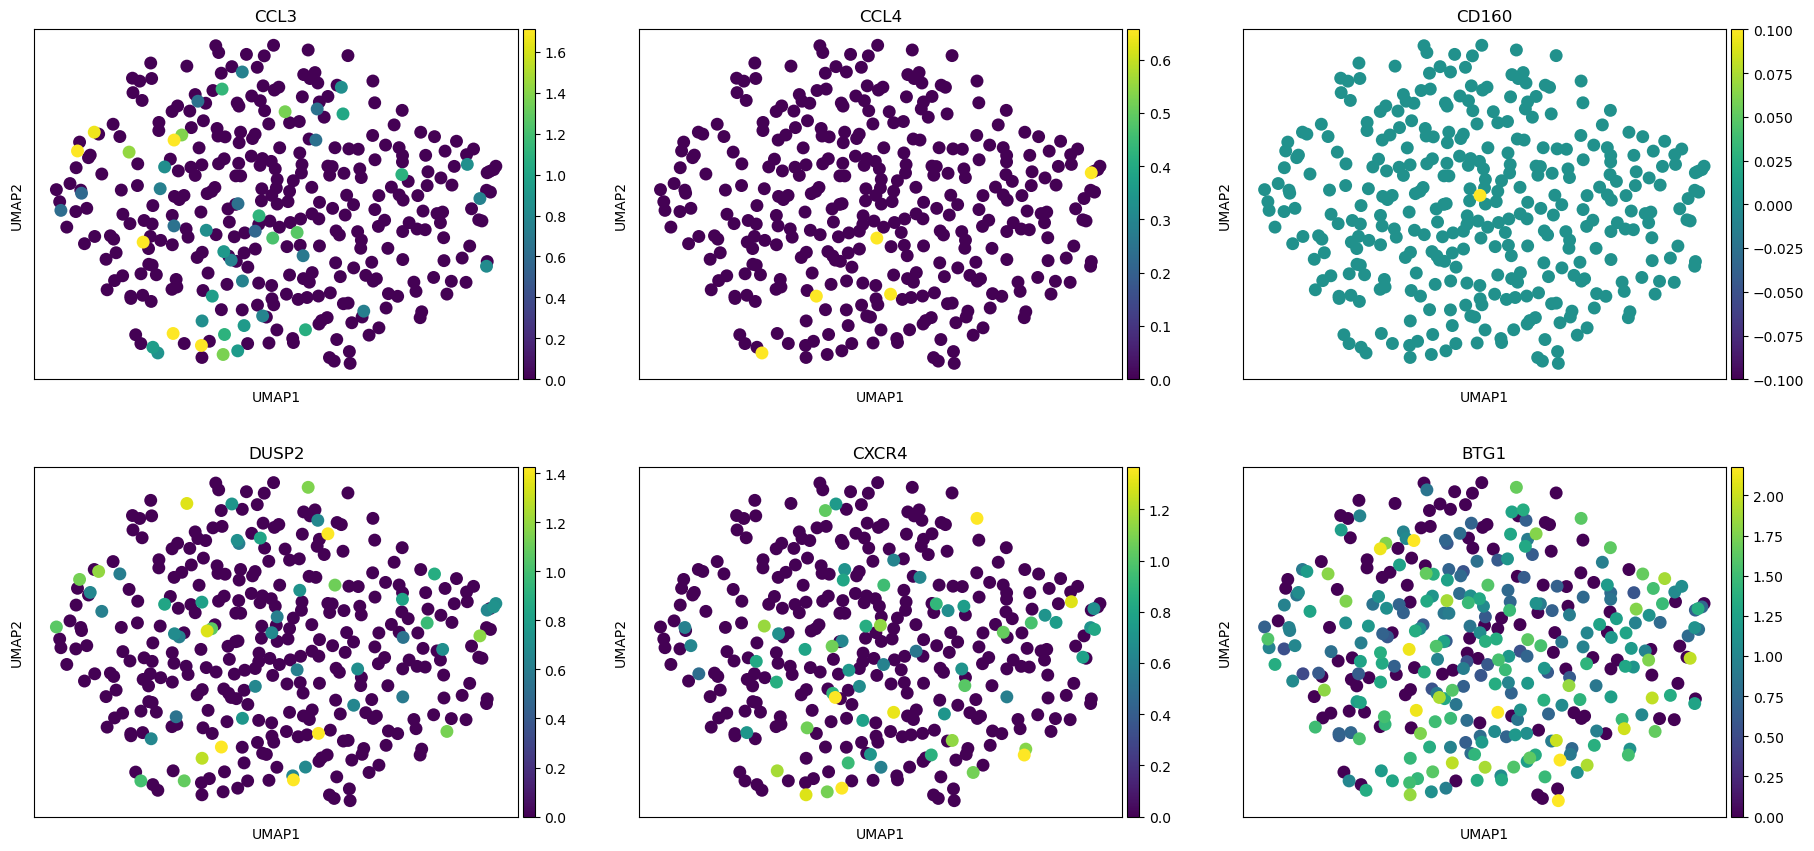

In [181]:
#Tissue-resident NK

tr_mels= ['CCL3', 'CCL4', 'CD160', 'DUSP2', 'CXCR4', 'BTG1'] #XCL1, GZMK not found

sc.pl.umap(adata_nk, color=tr_mels, ncols = 3, vmax="p99")